In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [173]:
df = pd.read_csv("gdelt_conflict_1_0 2.csv")

In [174]:
df.head()

,Year,CountryCode,CountryName,SumEvents,TotalEvents,NormalizedEvents1000,EventRootCode,EventRootDescr,EventCode,EventDescr,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone
0,1979,CH,China,350,33541,10.434990,19,FIGHT,193,Fight with small arms and light weapons,-10.0,3.988571,1396,1.906000
1,1979,HR,Croatia,14,714,19.607843,19,FIGHT,190,"Use conventional military force, not specified...",-10.0,2.642857,37,4.335594
2,1979,SU,Sudan,16,1354,11.816839,17,COERCE,173,"Arrest, detain, or charge with legal action",-5.0,6.000000,96,3.358047
3,1979,SY,Syria,71,3119,22.763706,19,FIGHT,193,Fight with small arms and light weapons,-10.0,3.647887,259,3.557653
4,1979,GM,Germany,33,6615,4.988662,17,COERCE,172,"Impose administrative sanctions, not specified...",-5.0,4.484848,148,4.841399


In [175]:
print(df.shape)

(176432, 14)


In [176]:
print(df.columns)

Index(['Year', 'CountryCode', 'CountryName', 'SumEvents', 'TotalEvents',
       'NormalizedEvents1000', 'EventRootCode', 'EventRootDescr', 'EventCode',
       'EventDescr', 'GoldsteinScale', 'AvgNumMentions', 'SumNumMentions',
       'AvgAvgTone'],
      dtype='object')


In [177]:
df.dtypes

Year                      int64
CountryCode              object
CountryName              object
SumEvents                 int64
TotalEvents               int64
NormalizedEvents1000    float64
EventRootCode             int64
EventRootDescr           object
EventCode                 int64
EventDescr               object
GoldsteinScale          float64
AvgNumMentions          float64
SumNumMentions            int64
AvgAvgTone              float64
dtype: object

In [178]:
df.isna().sum()

Year                    0
CountryCode             0
CountryName             0
SumEvents               0
TotalEvents             0
NormalizedEvents1000    0
EventRootCode           0
EventRootDescr          0
EventCode               0
EventDescr              0
GoldsteinScale          0
AvgNumMentions          0
SumNumMentions          0
AvgAvgTone              0
dtype: int64

In [179]:
print(df.EventRootDescr.value_counts())

COERCE                              69145
ASSAULT                             55967
FIGHT                               43271
USE UNCONVENTIONAL MASS VIOLENCE     8049
Name: EventRootDescr, dtype: int64


Which kind crime would you like to check for trend? (COERCE, ASSAULT, FIGHT, USE UNCONVENTIONAL MASS VIOLENCE) COERCE
Please specify the country:  Canada


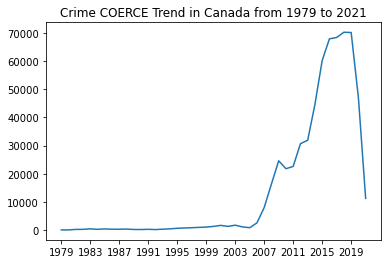

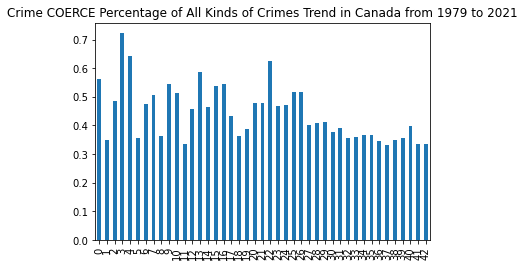

Do you want to do this again? (y/n) n


In [191]:
#With time, which kind of crime activities show an uptrend or downtrend?
more = "y"
while more == "y":
    crimeType = input("Which kind crime would you like to check for trend? (COERCE, ASSAULT, FIGHT, USE UNCONVENTIONAL MASS VIOLENCE)").upper()
    country = input("Please specify the country: ")

    if country != "All":
        sumOfYears = df[(df["EventRootDescr"] == crimeType) & (df["CountryName"] == country)] \
            .groupby("Year").sum().reset_index()
    else:
        sumOfYears = df[df["EventRootDescr"] == crimeType].groupby("Year").sum().reset_index()

    #To print the crime trend in the country in a line chart
    x, y = [], []
    for year in range(min(df.Year), max(df.Year) + 1):
        x.append(year)
        y.append(sumOfYears[sumOfYears.Year == year].SumEvents)

    titleSentence= "Crime " + crimeType + " Trend in " + country + " from 1979 to 2021"
    plt.title(titleSentence)

    plt.plot(x, y)
    plt.xticks(np.arange(min(df.Year), max(df.Year), 4))
    plt.show()  

    #To print the crime ration of all kinds of crimes ratio trend in the country in a bar chart
    sumOfYears["Ratio"] = sumOfYears.SumEvents / sumOfYears.TotalEvents * 100

    titleSentence= "Crime " + crimeType + " Percentage of All Kinds of Crimes Trend in " + country + " from 1979 to 2021"
    plt.title(titleSentence)

    sumOfYears.Ratio.plot.bar()
    plt.show()
    
    more = input("Do you want to do this again? (y/n)")

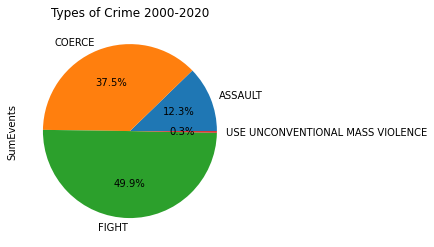

In [192]:
#Which crime category is the most common in a given period of time? Does the ratio change with time?

global1 = df[(df.Year <= 2020) & (df.Year > 2000)]
global1 = global1.groupby(global1.EventRootDescr).sum()["SumEvents"]

chart1 = global1.plot.pie(x='EventRootDescr', y='Total Events', title = "Types of Crime 2000-2020", rot=0, autopct='%1.1f%%')

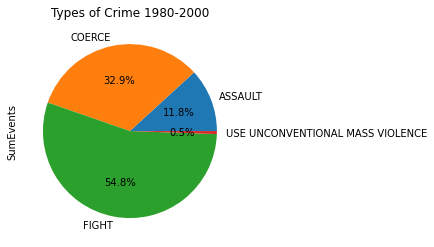

In [193]:
global2 = df[(df.Year <= 2000) & (df.Year > 1980)]
global2 = global2.groupby(global2.EventRootDescr).sum()["SumEvents"]

chart2 = global2.plot.pie(x='EventRootDescr', y='Total Events', title = "Types of Crime 1980-2000", rot=0, autopct='%1.1f%%')

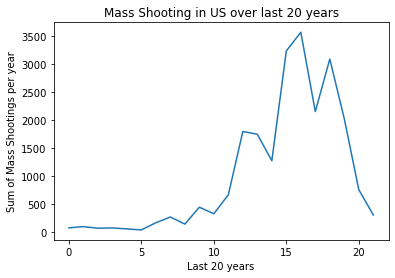

In [194]:
#Have mass shootings become more common in the U.S. in the past 20 years?
sf = df[(df["EventCode"] == 202) & (df["CountryCode"] == "US") & (df["Year"] >= 2000)]
cf = sf.groupby(["Year"]).sum().reset_index()
cff = cf.SumEvents


plt.plot(cff)
plt.title("Mass Shooting in US over last 20 years")
plt.xlabel("Last 20 years")
plt.ylabel("Sum of Mass Shootings per year")
plt.show()